# BAT SPIRE Detection Rate

Script to plot the detection rate of the BAT AGN at each SPIRE wavelength. This will plot the total detection rates along with the detection rates when splitting up the sample into Sy 1's and Sy 2's.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

In [10]:
sns.set_style('ticks')
sns.set_context('paper')
%matplotlib inline

In [5]:
#Upload our data
execfile('/Users/ttshimiz/Dropbox/Research/Thesis/scripts/upload_bat_ir_database.py')

bat_herschel = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_herschel.csv', index_col=0)
h250 = bat_herschel['PSW'].values
h350 = bat_herschel['PMW'].values
h500 = bat_herschel['PLW'].values

In [14]:
#Calculate detection rates
#The undetected objects are indicated as having a flux of 0
spire250_dr = float(np.sum(h250 != 0))/len(h250)
spire350_dr = float(np.sum(h350 != 0))/len(h350)
spire500_dr = float(np.sum(h500 != 0))/len(h500)
print 'All: ',spire250_dr, spire350_dr, spire500_dr
#Sy 1 detection rates
spire250_sy1_dr = float(np.sum(h250[sy1_sample] != 0))/np.sum(sy1_sample)
spire350_sy1_dr = float(np.sum(h350[sy1_sample] != 0))/np.sum(sy1_sample)
spire500_sy1_dr = float(np.sum(h500[sy1_sample] != 0))/np.sum(sy1_sample)
print 'Sy1: ',spire250_sy1_dr, spire350_sy1_dr, spire500_sy1_dr
#Sy 2 detection rates
spire250_sy2_dr = float(np.sum(h250[sy2_sample] != 0))/np.sum(sy1_sample)
spire350_sy2_dr = float(np.sum(h350[sy2_sample] != 0))/np.sum(sy1_sample)
spire500_sy2_dr = float(np.sum(h500[sy2_sample] != 0))/np.sum(sy1_sample)
print 'Sy2: ',spire250_sy2_dr, spire350_sy2_dr, spire500_sy2_dr

All:  0.859424920128 0.722044728435 0.460063897764
Sy1:  0.805369127517 0.624161073826 0.342281879195
Sy2:  0.953020134228 0.852348993289 0.590604026846


In [7]:
#Setup the figure
columnwidth = 245.26653   #in points
textwidth = 513.11743     #in points
pts2inches = 1./72.27    #Conversion from pts to inches
fw_column = columnwidth * pts2inches  #Figure width for a figure that spans the width of a column
fw_text   = textwidth * pts2inches    #Figure width for a figure that spans the width of the page
#mpl.rcParams['axes.labelsize'] = 10
#mpl.rcParams['xtick.labelsize'] = 10
#mpl.rcParams['ytick.labelsize'] = 10

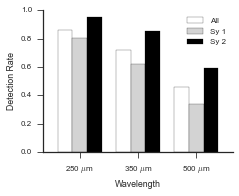

In [12]:
#Plot the detection rates as bar graph
fig = plt.figure(figsize=(fw_column, fw_column*3./4.))
ax = fig.add_subplot(111)
ax.bar([0.5, 2.5, 4.5], [spire250_dr, spire350_dr, spire500_dr], width=0.5, color='white', label='All')
ax.bar([1.0, 3.0, 5.0], [spire250_sy1_dr, spire350_sy1_dr, spire500_sy1_dr], width=0.5, color='lightgrey', label='Sy 1')
ax.bar([1.5, 3.5, 5.5], [spire250_sy2_dr, spire350_sy2_dr, spire500_sy2_dr], width=0.5, color='black', label='Sy 2')

ax.set_xticks([1.25, 3.25, 5.25])
ax.set_xticklabels(['250 $\mu$m', '350 $\mu$m', '500 $\mu$m'])
ax.set_xlabel('Wavelength')
ax.set_ylabel('Detection Rate')
ax.set_xlim(0.0, 6.5)
ax.legend(loc='upper right', fontsize=8)
sns.despine()

In [13]:
#Save the figure
fig.savefig('/Users/ttshimiz/Github/spire-catalog-paper/figures/detection_fraction/spire_detection_rates.eps',
            bbox_inches='tight')